In [49]:
# Sphere-Plane NN model
## https://www.adeveloperdiary.com/data-science/machine-learning/understand-and-implement-the-backpropagation-algorithm-from-scratch-in-python/

import matplotlib.pyplot as plt 
from math import exp
from math import sqrt

from random import seed
from random import random
from random import randint
import matplotlib.lines as lines 
import numpy as np

import math
 
# Initialize a network


class neuron_s():
    
    def __init__(self, n_inputs,c,o):
        self.mode = "C"
        self.outlayer = o
        self.inputs = [0 for _ in range(n_inputs)]
        self.weights = [random() for _ in range(n_inputs)]

        self.delta = 0
        self.output = 0
        self.R = .05 + 0.15*random()
        self.C = c
        self.al = 0.1
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dR = 0

        # adam parameters
        self.m_dw = [0 for _ in range(n_inputs)] 
        self.v_dw = [0 for _ in range(n_inputs)] 
        self.m_dR = 0 
        self.v_dR = 0
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.epsilon = 1e-8
        self.eta = 0.01        
        
        
        
    def copy (self):
        new_neuron = neuron_s(len(self.inputs), self.C, self.outlayer)
        new_neuron.inputs = self.inputs.copy()
        new_neuron.weights = self.weights.copy()
        new_neuron.delta = self.delta
        new_neuron.output = self.output
        new_neuron.R = self.R
        new_neuron.dR = self.dR
        new_neuron.dw = self.dw.copy()
        return new_neuron
    
    def activate(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.inputs[i] for i in range(N) ])
        y2 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        y3 = sum([self.weights[i]* self.weights[i] for i in range(N) ])
 
        activation = 1 - (y3 -  2*y2 + y1 )/(self.R**2)
        return activation
        
    def transfer_l(self,activation):
        self.output = activation
        return self.output
    
    def transfer_derivative_l(self):
        return 1
    
    def transfer(self,activation):
        
        if  -self.al*activation > 100:
            self.output = 0
        else:
            self.output = 1.0 / (1.0 + exp(-self.al*activation)) 
        return self.output
    
    def transfer_derivative(self):
        return self.al*self.output * (1.0 - self.output)

    # Calculate the derivative of the activation function
    def activation_derivate_by_input(self, idx):
        return 2*(self.weights[idx]-self.inputs[idx])/(self.R**2)

    def activation_derivate_by_weight(self, idx):
        return 2*(-self.weights[idx]+self.inputs[idx])/(self.R**2)

    def activation_derivate_by_R(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.inputs[i] for i in range(N) ])
        y2 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        y3 = sum([self.weights[i]* self.weights[i] for i in range(N) ])
        return 2*(y3 - 2*y2 +y1)  / (self.R**3) 
    
    def print_neuron_param(self):
        print(self.weights, self.R,self.C)
        
    def calculate_update(self, Ct, m_st):
        if self.output < .5 and self.C != Ct:
            return
        
        if self.output < .5 and m_st:
            return
        
        for j in range(len(self.weights)):
            self.dw[j] += ( self.delta * self.activation_derivate_by_weight(j))
        self.dR += self.delta*self.activation_derivate_by_R()
        #print(self.C,self.delta, self.activation_derivate_by_R(), self.delta*self.activation_derivate_by_R())
        
    def update_weights_adam(self, l_rate, t):
        for j in range(len(self.weights)):
            self.m_dw[j] = self.beta1*self.m_dw[j] + (1-self.beta1)*self.dw[j]
        # *** biases *** #
        self.m_dR = self.beta1*self.m_dR + (1-self.beta1)*self.dR

        ## rms beta 2
        # *** weights *** #
        for j in range(len(self.weights)):
            self.v_dw[j] = self.beta2*self.v_dw[j] + (1-self.beta2)*(self.dw[j]**2)
        # *** biases *** #
        self.v_dR = self.beta2*self.v_dR + (1-self.beta2)*(self.dR**2)

        ## bias correction
        m_dw_corr = [0 for _ in range(len(self.weights))] 
        v_dw_corr = [0 for _ in range(len(self.weights))] 
        for j in range(len(self.weights)):
            m_dw_corr[j] = self.m_dw[j]/(1-self.beta1**t)
        m_dR_corr = self.m_dR/(1-self.beta1**t)
        for j in range(len(self.weights)):
            v_dw_corr[j] = self.v_dw[j]/(1-self.beta2**t)
        v_dR_corr = self.v_dR/(1-self.beta2**t)
        
        for j in range(len(self.weights)):
            self.weights[j] -= self.eta*(m_dw_corr[j]/(np.sqrt(v_dw_corr[j])+self.epsilon))
        self.R -= self.eta*(m_dR_corr/(np.sqrt(v_dR_corr)+self.epsilon))
        
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dR = 0
        

    def update_weights(self, l_rate):
        #print ("update weights")
        
        dH = sqrt(sum([x**2 for x in self.dw]) + self.dR**2 )*.5
        if dH < 0.000001:
            dH = 1

        #print ("update :", self.inputs)
        for j in range(len(self.weights)):
            #print ("   ", self.weights[j],self.dw[j]/dH ," == > " ,self.weights[j] + l_rate * self.dw[j]/dH)
            self.weights[j] -= l_rate * self.dw[j]/dH
            
        #print ("   ", self.R,self.dR/dH," == > " ,self.R + l_rate * self.dR/dH)
        self.R -= l_rate * self.dR/dH
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dR = 0
        
    def draw_neuron(self, axes, plt):
        cl = 'blue' if self.C > 0 else 'red'
        cc = plt.Circle( (self.weights[0], self.weights[1] ), self.R ,fill = False,color=cl )   
        axes.add_artist( cc)    
        
        
class neuron_l():
    
    def __init__(self, n_inputs,c, o):
        self.mode = "L"
        self.C = c
        self.outlayer = o
        self.inputs = [0 for _ in range(n_inputs)]
        self.weights = [random() -.5 for _ in range(n_inputs)]
        self.delta = 0
        self.output = 0
        self.A = random() - .5
        #s1 = sqrt(sum([x**2 for x in self.weights]))
        #self.weights = [x / s1 for x in self.weights]
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dA = 0
        
        # adam parameters
        self.m_dw = [0 for _ in range(n_inputs)] 
        self.v_dw = [0 for _ in range(n_inputs)] 
        self.m_dA = 0 
        self.v_dA = 0
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.epsilon = 1e-8
        self.eta = 0.01        
        
        
    def copy (self):
        new_neuron = neuron_l(len(self.inputs),  self.C, self.outlayer)
        new_neuron.inputs = self.inputs.copy()
        new_neuron.weights = self.weights.copy()
        new_neuron.delta = self.delta
        new_neuron.output = self.output
        new_neuron.A = self.A
        new_neuron.dA = self.dA
        new_neuron.dw = self.dw.copy()
        return new_neuron

    def activate(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        activation = (y1  + self.A) 
        #print (self.C,"activate    ", self.weights, self.A, ":", self.inputs,"==>", activation)
        return activation
    
    def transfer(self,activation):
        self.output = 1.0 / (1.0 + exp(-activation)) 
        #print (self.C,"transfer    ", activation,"==>", self.output)
        return self.output

    def transfer_derivative(self):
        return self.output * (1.0 - self.output)

    # Calculate the derivative of the activation function
    def activation_derivate_by_input(self, idx):
        return self.weights[idx]

    def activation_derivate_by_weight(self, idx):
        return  self.inputs[idx]

    def activation_derivate_by_A(self):
        return 1
    
    def print_neuron_param(self):
        print(self.weights, self.A, self.C,":",self.inputs, self.output)

    def calculate_update(self, Ct, m_st):
        #print (self.C,"calc_delta    ",self.dw, self.dA ,"==>", )
        for j in range(len(self.weights)):
            self.dw[j] += self.delta * self.activation_derivate_by_weight(j)
        self.dA +=  self.delta*self.activation_derivate_by_A()
        #print (self.C,"          ==>",self.dw, self.dA  )

        
    def update_weights_adam(self, l_rate, t):
        for j in range(len(self.weights)):
            self.m_dw[j] = self.beta1*self.m_dw[j] + (1-self.beta1)*self.dw[j]
        # *** biases *** #
        self.m_dA = self.beta1*self.m_dA + (1-self.beta1)*self.dA

        ## rms beta 2
        # *** weights *** #
        for j in range(len(self.weights)):
            self.v_dw[j] = self.beta2*self.v_dw[j] + (1-self.beta2)*(self.dw[j]**2)
        # *** biases *** #
        self.v_dA = self.beta2*self.v_dA + (1-self.beta2)*(self.dA**2)

        ## bias correction
        m_dw_corr = [0 for _ in range(len(self.weights))] 
        v_dw_corr = [0 for _ in range(len(self.weights))] 
        for j in range(len(self.weights)):
                m_dw_corr[j] = self.m_dw[j]/(1-self.beta1**t)
        m_dA_corr = self.m_dA/(1-self.beta1**t)
        for j in range(len(self.weights)):
            v_dw_corr[j] = self.v_dw[j]/(1-self.beta2**t)
        v_dA_corr = self.v_dA/(1-self.beta2**t)
        
        for j in range(len(self.weights)):
            self.weights[j] -= self.eta*(m_dw_corr[j]/(np.sqrt(v_dw_corr[j])+self.epsilon))
        self.A -= self.eta*(m_dA_corr/(np.sqrt(v_dA_corr)+self.epsilon))
        
        s1 = sqrt(sum([x**2 for x in self.weights]))
        self.weights = [x / s1 for x in self.weights]
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dA = 0
        
    def update_weights(self, l_rate):
        #print (self.C,"update    ", self.weights,self.A)
        for j in range(len(self.weights)):
            self.weights[j] -=  l_rate * self.dw[j]
        self.A -= l_rate * self.dA
        #print (self.C,"        ==>", self.weights,self.A)

        #s1 = sqrt(sum([x**2 for x in self.weights]))
        #self.weights = [x / s1 for x in self.weights]
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dA = 0
        
    def draw_neuron(self, axes, plt):
        cl = 'blue' if self.C > 0 else 'red'
        x1 = -2
        y1 = (-self.A - self.weights[0]*x1) / self.weights[1]
        x2 = 8
        y2 = (-self.A - self.weights[0]*x2) / self.weights[1]
        
        line   = plt.Line2D([x1,x2],[y1,y2],color = cl)
        #print ("line",[x1,x2],[y1,y2],"w",self.weights)
        plt.gca().add_line(line)    
        
        
class SSNN_network():
    
    def __init__ (self):
        self.layers = []
        self.HL = 0
        self.OL = 0
        self.outputs = []
        self.tr_stat = [-1]

    def init (self, n_inputs, hidden_nmode, outputs_nmode):
        self.layers = []
        n_outputs = len(outputs_nmode)
        n_hiddens = len(hidden_nmode)
        self.outputs = [outputs_nmode[i][1] for i in range(len(outputs_nmode))]
        self.HL = -1
        self.OL = 0
        self.layers.append([])
        if n_hiddens > 0:
            self.layers.append([])
            self.HL = 0
            self.OL = 1
            for i in range(n_hiddens):
                if hidden_nmode[i][0] == 'S': 
                    self.layers[self.HL].append(neuron_s(n_inputs,hidden_nmode[i][1],False))
                else:
                    self.layers[self.HL].append(neuron_l(n_inputs,hidden_nmode[i][1],False))
            for i in range(n_outputs):
                if outputs_nmode[i][0] == 'S': 
                    self.layers[self.OL].append(neuron_s(n_hiddens,outputs_nmode[i][1],True))
                else:
                    self.layers[self.OL].append(neuron_l(n_hiddens,outputs_nmode[i][1],True))
        else:
            for i in range(n_outputs):
                if outputs_nmode[i][0] == 'S': 
                    self.layers[self.OL].append(neuron_s(n_inputs,outputs_nmode[i][1],True))
                else:
                    self.layers[self.OL].append(neuron_l(n_inputs,outputs_nmode[i][1],True))
                    
                    
                    
    def copy(self):
        new_network = SSNN_network()
        new_network.outputs = self.outputs.copy()
        new_network.HL = self.HL
        new_network.OL = self.OL
        new_network.HL = self.HL
        for i in range(len(self.layers)):
            new_network.layers.append([])            
            for neuron in self.layers[i]:
                new_network.layers[i].append(neuron.copy())
        return new_network
        
    def forward_propagate(self, row):
        for neuron in self.layers[0]:
            for i in range(len(neuron.inputs)):
                neuron.inputs[i] = row[i]

        m_status = False 
                
        for l in range(len(self.layers)):
            layer = self.layers[l]
            for neuron in layer:
                activation = neuron.activate()
                neuron.transfer(activation)
                if neuron.mode == 'C':
                    if neuron.output > .5 and neuron.C == row[-1]:
                        m_status = True
            if l < self.OL:
                for neuron in self.layers[l+1]:
                    for i in range(len(self.layers[l])):
                        neuron2 = self.layers[l][i]
                        neuron.inputs[i] = neuron2.output

        outputs = []
        for neuron in self.layers[self.OL]:
            outputs.append(neuron.output)
        return (outputs, m_status)
     
    
    def backward_propagate_error(self, expected):
        for lv in reversed(range(len(self.layers))):
            layer = self.layers[lv]
            if lv != self.OL:
                for j in range(len(layer)):
                    neuron = layer[j]
                    error = 0.0
                    for q in range(len(self.layers[lv + 1])):
                        neuron_out = self.layers[lv + 1][q]
                        error += (neuron_out.activation_derivate_by_input(j) * neuron_out.delta)
                    
                    neuron.delta = error * neuron.transfer_derivative()
            else:
                for j in range(len(layer)):
                    neuron = layer[j]
                    neuron.delta = -(expected[j] - neuron.output) * neuron.transfer_derivative()
                #print("prop error",neuron.delta, errors[j] , neuron.transfer_derivative())
                
    def test_update_weights(self, l_rate, train):
        #print ("Update weights test")
        acc = self.test_network(train)
        err = self.get_error(train)
        X = [0]
        YE = [err]
        YA = [acc]
        #print ("base:",acc,err)
        for l in [0.1 + 0.1*x for x in range(20)]:
            networks = self.copy()
            networks.update_weights(l)
            acc = networks.test_network(train)
            err = networks.get_error(train)
            #print (l,":",acc,err)
            X.append(l)
            YE.append(err)
            YA.append(acc)

        plt.plot(X,YE)
        plt.show()
        plt.plot(X,YA)
        plt.show()
                
            
    def get_error(self, train):
        train = self.normalize(train) 
        sum_error = 0
        n_outputs = len(self.outputs)
        for row in train:
            voutputs = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            for i in range(n_outputs):
                if self.outputs[i] == row[-1]:
                    expected[i] = 1
            sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
        return sum_error

    def test_network(self, train):
        train = self.normalize(train)
        n_outputs = len(self.outputs)
        dbok = 0
        self.tr_stat = [0 for _ in range(len(train))]
        #print("test")
        for i in range(len(train)):
            row = train[i]
            (voutputs,_) = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            idx = voutputs.index(max(voutputs))
            if self.outputs[idx] == row[-1]:
                dbok += 1
                self.tr_stat[i] = 1
            print (row, voutputs, self.tr_stat[i])
        #print ("accuray:", dbok / len(train))
        return dbok / len(train)
    
    def calculate_update(self, C, m_st):
        for i in range(len(self.layers)):
            for neuron in self.layers[i]:
                neuron.calculate_update(C, m_st);
    
    def update_weights(self, l_rate, t):
        for i in range(len(self.layers)):
            for neuron in self.layers[i]:
                neuron.update_weights_adam(l_rate,t);
                #neuron.update_weights(l_rate);

    def train_network(self, train, l_rate, n_epoch, drf = 5):
        train = self.normalize(train)
        errorlist = []
        n_outputs = len(self.outputs)
        #print ("INDULO -----------------------------------------------------------")
        acc = self.test_network (T)
        #print ("inti acc:", acc)
        self.draw_network( train)
        self.print_network_param()
        #print ("-----------------------------------------------------------")
        min_error = 100000000
        t = 1
        for epoch in range(n_epoch):
            sum_error = 0
            for row in train:
                                     
                #print ("forward_propagate -----------------", row)
                (voutputs, cst)  = self.forward_propagate( row)
                
                expected = [0 for i in range(n_outputs)]
                for i in range(n_outputs):
                    if self.outputs[i] == row[-1]:
                        expected[i] = 1
                sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
                
                #print ("backward_propagate -----------------", expected)
                self.backward_propagate_error( expected)
                
                #if random() < 0.1:
                #    self.test_update_weights(l_rate,train)

                #print ("calculate update -----------------", cst)
                self.calculate_update(row[-1], cst)
                
            #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
            
            errorlist.append(sum_error)
            if sum_error < min_error:
                min_error = sum_error
                winner_network = network.copy()
                
            #if epoch % drf == 0:
            #print ("update weights -----------------------------------")
            self.update_weights(l_rate, t)
            t = t + 1
            
            #self.draw_network( train)
            #self.print_network_param()
        sum_error = 0
        for row in train:
            (voutputs, _) = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            for i in range(n_outputs):
                if self.outputs[i] == row[-1]:
                    expected[i] = 1
            sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
        #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        if sum_error < min_error:
            min_error = sum_error
            winner_network = network.copy()
        
        #print ("ZARO -----------------------------------------------------------")
        acc = winner_network.test_network (T)
        winner_network.draw_network( train)
        self.print_network_param()
        #print ("----------------------------------------------------------------")
        print ("min error:", min_error)
        print ("accuracy:",acc)
        plt.plot( [ i for i in range(len(errorlist))], errorlist) 
        plt.show()
        acc2 = network.test_network (T)
        print ("accuracy2:",acc2)
        return winner_network
            
    def draw_network (self, train):
        
        if self.OL == 0:
            figure, axes = plt.subplots()
            axes.set_aspect( 1 )
            for i in range(len(self.layers[self.OL])):
                sn = self.layers[self.OL][i]
                sn.draw_neuron(axes, plt)
            for i in range(len(train)):
                cl = 'blue' if train[i][2] > 0 else 'red'
                cc = plt.Circle( (train[i][0], train[i][1] ), 0.03 ,fill = True, color =cl )   
                axes.add_artist( cc)        
                if self.tr_stat[0]> -1:
                    if self.tr_stat[i] == 1:
                        cc = plt.Circle( (train[i][0], train[i][1] ), 0.05 ,fill = True, color ="green" )   
                        axes.add_artist( cc)        

            plt.xlim( -1 , 2) 
            plt.ylim( -1 , 2) 
            plt.title( 'Circle' ) 
            plt.show()            
        if self.OL == 1:
            figure, axes = plt.subplots()
            axes.set_aspect( 1 )
            for i in range(len(self.layers[0])):
                sn = self.layers[0][i]
                sn.draw_neuron(axes, plt)
            for i in range(len(train)):
                cl = 'blue' if train[i][2] > 0 else 'red'
                cc = plt.Circle( (train[i][0], train[i][1] ), 0.03 ,fill = True, color =cl )   
                axes.add_artist( cc)   
                if self.tr_stat[0]> -1:
                    if self.tr_stat[i] == 1:
                        cc = plt.Circle( (train[i][0], train[i][1] ), 0.05 ,fill = True, color ="green" )   
                        axes.add_artist( cc)        
                    
            plt.xlim( -1 , 2) 
            plt.ylim( -1 , 2) 
            plt.title( 'Circle' ) 
            plt.show()            
            
            '''
            figure, axes = plt.subplots()
            axes.set_aspect( 1 )
            for i in range(len(self.layers[1])):
                sn = self.layers[1][i]
                sn.draw_neuron(axes, plt)
            for i in range(len(train)):
                cl = 'blue' if train[i][2] > 0 else 'red'
                cc = plt.Circle( (train[i][0], train[i][1] ), 0.03 ,fill = True, color =cl )   
                axes.add_artist( cc)        
            plt.xlim( -1 , 2) 
            plt.ylim( -1 , 2) 
            plt.title( 'Circle' ) 
            plt.show()            
            '''
            
                
    def print_network_param(self):
        for layer in self.layers:
            print ("Layer ---------------")
            for neuron in layer:
                neuron.print_neuron_param()
            
    def normalize (self, train):
        mx = []
        mn = []
        for i in range(len(train[0])-1):
            mx.append(max([x[i] for x in train ]))
            mn.append(min([x[i] for x in train ]))
        for row in train:
            for i in range(len(row)-1):
                row[i] = (row[i] - mn[i]) / (mx[i] - mn[i]) 
        return train
    
        
    

[0.26336117237621176, 0.37991369788219237, 0] [0.5026997966612974, 0.47034169765720535] 1
[0.09894605491896306, 0.35428162494463916, 0] [0.5005201287308538, 0.47434682210461165] 1
[0.3402799517210561, 0.6315596257493117, 0] [0.5118877410484827, 0.447997186837083] 1
[0.08927066745445217, 0.2846407039653182, 0] [0.4990347022506801, 0.47790019222893837] 1
[0.2987274142216241, 0.44178171013799783, 0] [0.5050058477752235, 0.4649964102979845] 1
[0.8690412800774844, 0.40830924828984627, 1] [0.515236479260768, 0.43343880072942637] 0
[0.5822146291970711, 0.31707416939152616, 1] [0.5101221416387677, 0.4549377626711654] 0
[0.780942772329747, 0.27387201759974567, 1] [0.5178647579061234, 0.43814377694190837] 0
[1.0, 0.0, 1] [0.5294509722034587, 0.4176304435146418] 0
[0.874818236281241, 0.5102461715431029, 1] [0.5083145598634717, 0.43746267766197616] 0
[0.0, 0.7823316317969345, 1] [0.518803013591594, 0.43422420352848207] 0
[0.08748182362812408, 0.8639572698730841, 1] [0.5224258351042862, 0.427018075

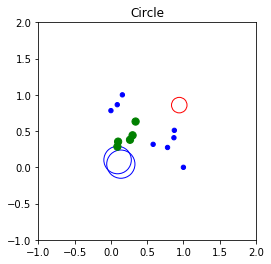

Layer ---------------
[0.9427827393594042, 0.8581382371834275] 0.10702246841298345 0
[0.09188191237269583, 0.100535959051965] 0.18947774034271136 1
[0.13661175738330344, 0.0437518088470078] 0.19481259879015517 1
Layer ---------------
[-0.2957113115636357, -0.36678537410618084, 0.07352568695589368] 0.14439212449453842 0 : [0.004262650439762111, 0.10288033733300611, 0.09024974423712578] 0.5279788125640719
[0.28527889226594116, 0.40546644304806356, 0.22962834937851007] -0.4032252219900547 1 : [0.004262650439762111, 0.10288033733300611, 0.09024974423712578] 0.4159137499246337
[0.26336117237621176, 0.37991369788219237, 0] [0.39135816232629744, 0.60509645893828] 0
[0.09894605491896306, 0.35428162494463916, 0] [0.3892080698790095, 0.6038225189914229] 0
[0.3402799517210561, 0.6315596257493117, 0] [0.3808646252718007, 0.6092610486275667] 0
[0.08927066745445217, 0.2846407039653182, 0] [0.39135962196339596, 0.6027309198246945] 0
[0.2987274142216241, 0.44178171013799783, 0] [0.3893171251621476, 0.

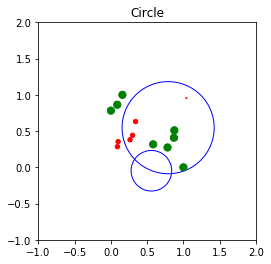

Layer ---------------
[1.040215021027498, 0.9549244394889776] 0.0074025822596596475 0
[1.3269457548367996, 0.6934113621741483] 1.2768851192498425 1
[0.7762283435782215, -0.4324824505760179] -0.05491951812712014 1
Layer ---------------
[-5.5572781905234026e-40, -0.8618986996742072, -0.5070804980473128] -0.030035262442054365 0 : [0, 0.5026046800424634, 9.824570230191383e-36] 0.38621995729181374
[7.5060110361807e-42, 0.8368169443001928, 0.547482786699352] 0.04281489223052368 1 : [0, 0.5026046800424634, 9.824570230191383e-36] 0.6138211523298266
min error: 6.094030633713568
accuracy: 0.6153846153846154


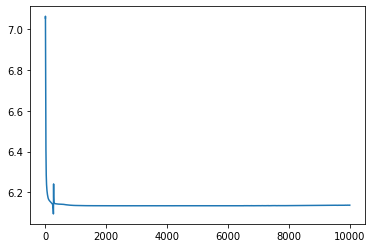

[0.26336117237621176, 0.37991369788219237, 0] [0.38549635745347555, 0.6145236743068625] 0
[0.09894605491896306, 0.35428162494463916, 0] [0.3867289418654842, 0.6133270024693825] 0
[0.3402799517210561, 0.6315596257493117, 0] [0.38470744598771056, 0.6152896216448753] 0
[0.08927066745445217, 0.2846407039653182, 0] [0.38696699605784807, 0.6130958888978161] 0
[0.2987274142216241, 0.44178171013799783, 0] [0.3851554174624229, 0.6148546879157576] 0
[0.8690412800774844, 0.40830924828984627, 1] [0.38256461123086793, 0.6173701686634269] 1
[0.5822146291970711, 0.31707416939152616, 1] [0.3838290505311762, 0.6161424684339298] 1
[0.780942772329747, 0.27387201759974567, 1] [0.38313573386805005, 0.6168156356714947] 1
[1.0, 0.0, 1] [0.3834391369036393, 0.6165265986548905] 1
[0.874818236281241, 0.5102461715431029, 1] [0.3823994938069445, 0.6175304918571365] 1
[0.0, 0.7823316317969345, 1] [0.3871857167767412, 0.6128835464401475] 1
[0.08748182362812408, 0.8639572698730841, 1] [0.3865483061433281, 0.61350237

In [50]:
T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1],
    [0.673756466,5.508563011,1],
    [1.373756466,6.108563011,1],
    [1.93756466,7.108563011,1] 
    ]

#T = [[2.7810836,2.550537003,0],
#    [1.93756466,7.108563011,1] 
#    ]
#seed(1974)

n_inputs = len(T[0]) - 1
network = SSNN_network()
#network.init(n_inputs, [],[('S',0),('S',1)])
#network.init(n_inputs, [],[('L',0),('L',1)])
network.init(n_inputs, [('S',0),('S',1),('S',1)],[('L',0),('L',1)])
#network = set_network_1(network)
#network.print_network_param()
opt_nw = network.train_network( T, .02, 10000,10)


Layer ---------------
[-6.8267736, -6.245519] 2.3148985 0 : [0, 0] 0
[4.263523, 5.272369] -6.9543853 1 : [0, 0] 0
[0.26336117237621176, 0.37991369788219237, 0] [0.13519722728898134, 0.021279671977660293] 1
[0.09894605491896306, 0.35428162494463916, 0] [0.36048575940717525, 0.00933483904555116] 1
[0.3402799517210561, 0.6315596257493117, 0] [0.018844066083577204, 0.10213002504674398] 0
[0.08927066745445217, 0.2846407039653182, 0] [0.4819425916328752, 0.006224322321758487] 1
[0.2987274142216241, 0.44178171013799783, 0] [0.07701576667068337, 0.03384549355132375] 1
[0.8690412800774844, 0.40830924828984627, 1] [0.0020911396691784914, 0.25040549971212045] 1
[0.5822146291970711, 0.31707416939152616, 1] [0.025579748664906116, 0.05730430304725153] 1
[0.780942772329747, 0.27387201759974567, 1] [0.0087762255621206, 0.10148216446125323] 1
[1.0, 0.0, 1] [0.010858651569946365, 0.06351470891299915] 1
[0.874818236281241, 0.5102461715431029, 1] [0.0010646545262257773, 0.3694978761183695] 1
[0.0, 0.78233

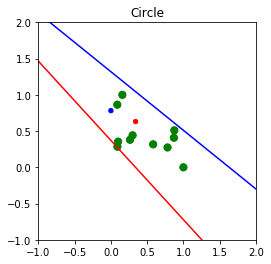

accuracy: 0.8461538461538461


In [107]:
ws = [[-6.8267736, -6.245519 ],
       [  4.263523,  5.272369 ]]
aa = [ 2.3148985, -6.9543853]

T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1],
    [0.673756466,5.508563011,1],
    [1.373756466,6.108563011,1],
    [1.93756466,7.108563011,1] 
    ]

net = SSNN_network()
net.init(n_inputs, [],[('L',0),('L',1)])
layer = net.layers[0]
for i in range(len(layer)):
    neuron = layer[i]
    for j in range(len(neuron.weights)):
        neuron.weights[j] = ws[i][j]
        #neuron.weights[j] = ws[j][i]
    s1 = sqrt(sum([x**2 for x in neuron.weights]))
    #neuron.weights = [x / s1 for x in neuron.weights]
    neuron.A = aa[i]
net.print_network_param()
acc = net.test_network (T)
net.draw_network( T)
print ("accuracy:",acc)

In [92]:

xb = [0.26336117237621176, 0.37991369788219237] 
yk = net.forward_propagate(xb)
print(yk)

([0.13519722728898134, 0.021279671977660293], False)


In [78]:
net.print_network_param()

Layer ---------------
[-6.8267736, -6.245519] 2.541443 0 : [0.26336117237621176, 0.37991369788219237] 0.0012146204036555417
[4.263523, 5.272369] -6.647712 1 : [0.26336117237621176, 0.37991369788219237] 0.9999430684308345


In [77]:
def sigm(x):
    return 1 / (1 + math.exp(-x))
# -6.8267736 0.2633612 -6.245519 0.3799137 2.3148985
print (sigm (-6.8267736* 0.2633612 -6.245519* 0.3799137 +2.3148985))

0.13519720369378802


In [87]:
print(net.layers[0][0].inputs,net.layers[0][0].output)
print(net.layers[0][0].activate())

[0.26336117237621176, 0.37991369788219237] 0.001522977534847567
-6.485563817326464
